# Dirichlet Recommender

The dirichlet distribution is a key factor when considering the way we recommend images. But how can we use it on its own to provide recommendations?

In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

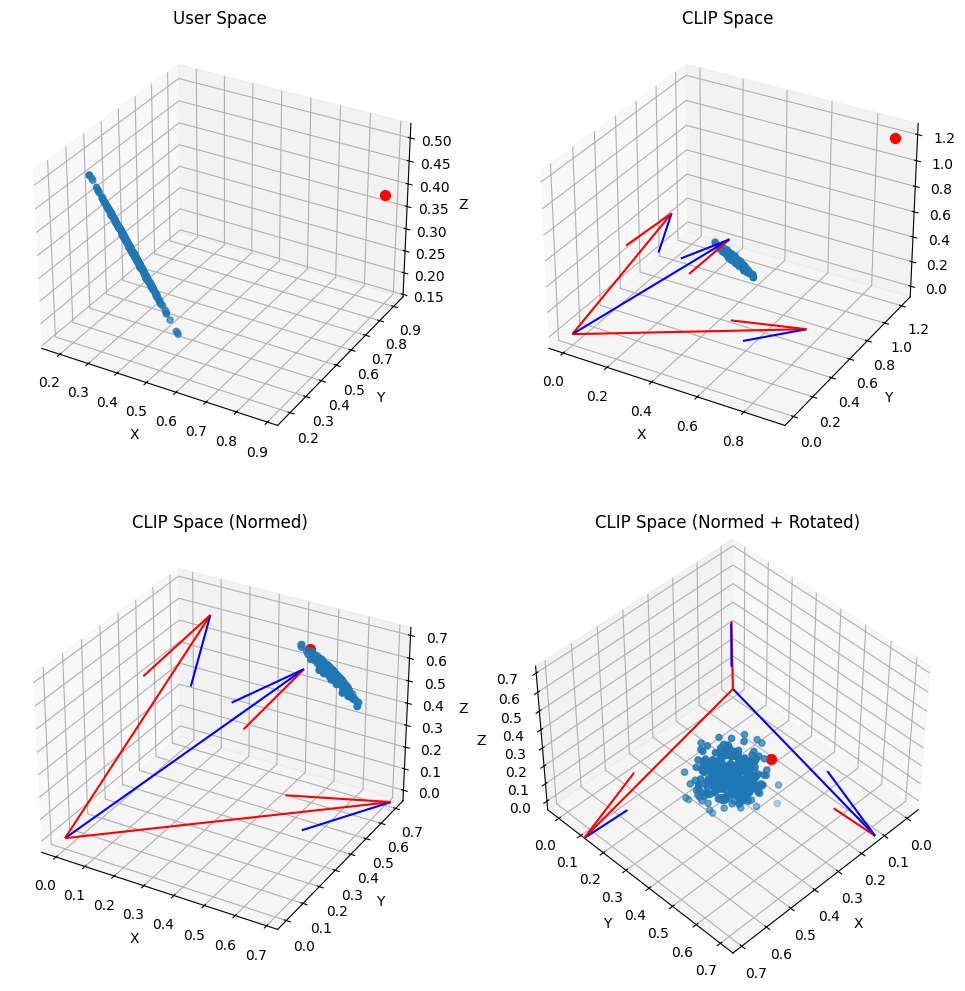

In [4]:
torch.manual_seed(42)

# Define three Vectors defining the User Space in the CLIP space
origin = torch.tensor([[0, 0, 0], [0, 0, 0], [0, 0, 0]]) # origin point
heads = torch.tensor([[0.35, 0.35, 1.], [0.35, 1., 0.35], [1., 0.35, 0.35]])
heads_normed = F.normalize(heads, p=2, dim=-1)

user_profile = torch.rand(size=(1,3))

# Generate samples from the Dirichlet distribution
num_samples = 300
alpha = torch.ones(3) * 20  # Concentration parameter (uniform)
distribution = torch.distributions.dirichlet.Dirichlet(alpha)
x_rand = distribution.sample(sample_shape=(num_samples,))

# Plot the samples in the user space
fig = plt.figure(figsize=(12, 12))
ax_0 = fig.add_subplot(2, 2, 1, projection='3d')
ax_0.scatter(x_rand[:,0], x_rand[:,1], x_rand[:, 2])
ax_0.scatter(user_profile[:,0], user_profile[:,1], user_profile[:,2], c='red', s=50)
ax_0.set_title('User Space')
ax_0.set_xlabel('X')
ax_0.set_ylabel('Y')
ax_0.set_zlabel('Z')

# Plot random samples transformed into the CLIP space
embeds =  x_rand @ heads_normed
user_embed = user_profile @ heads_normed
ax_1 = fig.add_subplot(2, 2, 2, projection='3d')
ax_1.quiver(*origin, heads_normed[:,0], heads_normed[:,1], heads_normed[:,2], color=['r','b'])
ax_1.scatter(embeds[:,0], embeds[:,1], embeds[:,2])
ax_1.scatter(user_embed[:,0], user_embed[:,1], user_embed[:,2], c='red', s=50)
ax_1.set_title('CLIP Space')
ax_1.set_xlabel('X')
ax_1.set_ylabel('Y')
ax_1.set_zlabel('Z')

# Project embeds on the spheres surface in the CLIP Space
embeds_proj = F.normalize(embeds, p=2, dim=-1)
user_embed_proj = F.normalize(user_embed, p=2, dim=-1)
ax_2 = fig.add_subplot(2, 2, 3, projection='3d')
ax_2.quiver(*origin, heads_normed[:,0], heads_normed[:,1], heads_normed[:,2], color=['r','b'])
ax_2.scatter(embeds_proj[:,0], embeds_proj[:,1], embeds_proj[:,2])
ax_2.scatter(user_embed_proj[:,0], user_embed_proj[:,1], user_embed_proj[:,2], c='red', s=50)
ax_2.set_title('CLIP Space (Normed)')
ax_2.set_xlabel('X')
ax_2.set_ylabel('Y')
ax_2.set_zlabel('Z')

# Same PLot but with a front view
ax_3 = fig.add_subplot(2, 2, 4, projection='3d')
ax_3.quiver(*origin, heads_normed[:,0], heads_normed[:,1], heads_normed[:,2], color=['r','b'])
ax_3.scatter(embeds_proj[:,0], embeds_proj[:,1], embeds_proj[:,2])
ax_3.scatter(user_embed_proj[:,0], user_embed_proj[:,1], user_embed_proj[:,2], c='red', s=50)
ax_3.set_title('CLIP Space (Normed + Rotated)')
ax_3.set_xlabel('X')
ax_3.set_ylabel('Y')
ax_3.set_zlabel('Z')

#Rotate to se the sphere
angle = 90
angle_norm = (angle + 180) % 360 - 180
elev = 45
azim = 45
roll = 0
ax_3.view_init(elev, azim, roll)

plt.show()

# Thoughts

We can use the user-profile as our alpha to shape the probability of the dirichlet distribution in favour of our users preference. Let's test this out!

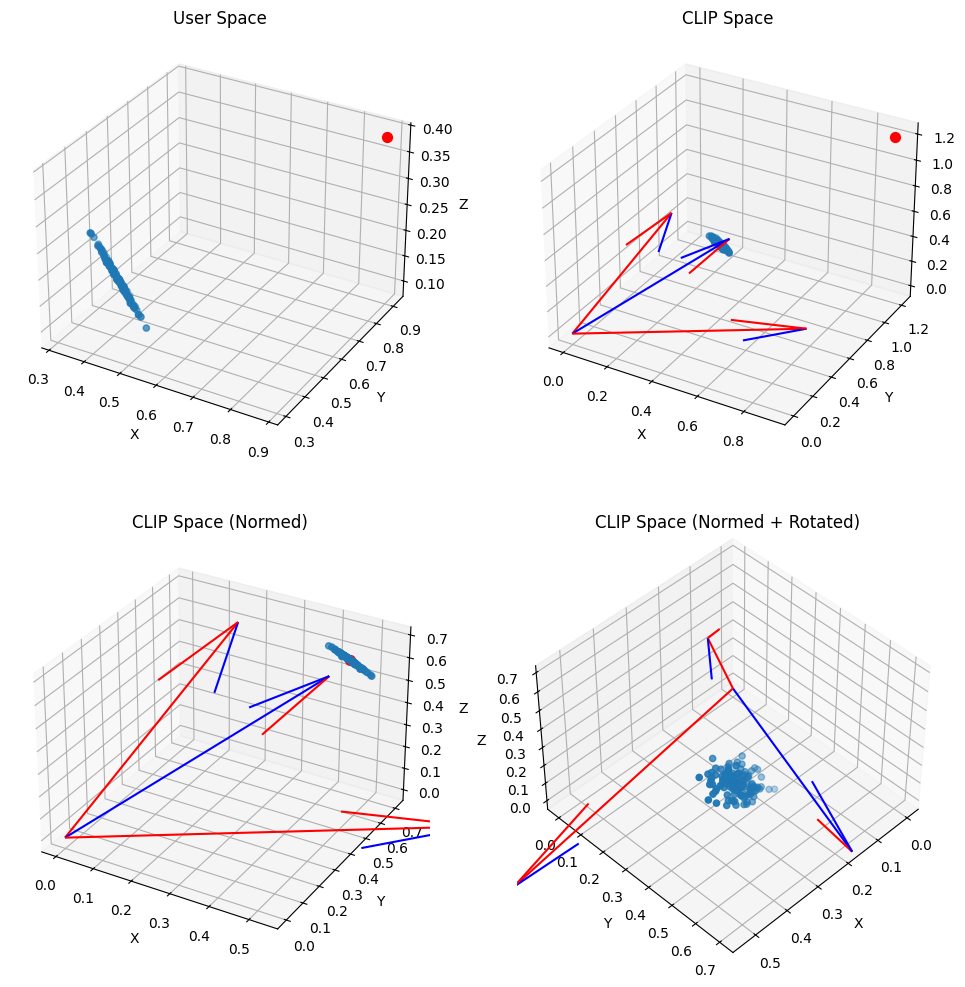

In [8]:
torch.manual_seed(42)

# Define three Vectors defining the User Space in the CLIP space
origin = torch.tensor([[0, 0, 0], [0, 0, 0], [0, 0, 0]]) # origin point
heads = torch.tensor([[0.35, 0.35, 1.], [0.35, 1., 0.35], [1., 0.35, 0.35]])
heads_normed = F.normalize(heads, p=2, dim=-1)

user_profile = torch.rand(size=(1,3))

# Generate samples from the Dirichlet distribution that is adapted to the user_profile
num_samples = 130
beta = 50
alpha = (torch.ones(3) * user_profile).reshape(-1) * beta  # Concentration parameter (uniform)
distribution = torch.distributions.dirichlet.Dirichlet(alpha)
x_rand = distribution.sample(sample_shape=(num_samples,))

# Plot the samples in the user space
fig = plt.figure(figsize=(12, 12))
ax_0 = fig.add_subplot(2, 2, 1, projection='3d')
ax_0.scatter(x_rand[:,0], x_rand[:,1], x_rand[:, 2])
ax_0.scatter(user_profile[:,0], user_profile[:,1], user_profile[:,2], c='red', s=50)
ax_0.set_title('User Space')
ax_0.set_xlabel('X')
ax_0.set_ylabel('Y')
ax_0.set_zlabel('Z')

# Plot random samples transformed into the CLIP space
embeds =  x_rand @ heads_normed
user_embed = user_profile @ heads_normed
ax_1 = fig.add_subplot(2, 2, 2, projection='3d')
ax_1.quiver(*origin, heads_normed[:,0], heads_normed[:,1], heads_normed[:,2], color=['r','b'])
ax_1.scatter(embeds[:,0], embeds[:,1], embeds[:,2])
ax_1.scatter(user_embed[:,0], user_embed[:,1], user_embed[:,2], c='red', s=50)
ax_1.set_title('CLIP Space')
ax_1.set_xlabel('X')
ax_1.set_ylabel('Y')
ax_1.set_zlabel('Z')

# Project embeds on the spheres surface in the CLIP Space
embeds_proj = F.normalize(embeds, p=2, dim=-1)
user_embed_proj = F.normalize(user_embed, p=2, dim=-1)
ax_2 = fig.add_subplot(2, 2, 3, projection='3d')
ax_2.quiver(*origin, heads_normed[:,0], heads_normed[:,1], heads_normed[:,2], color=['r','b'])
ax_2.scatter(embeds_proj[:,0], embeds_proj[:,1], embeds_proj[:,2])
ax_2.scatter(user_embed_proj[:,0], user_embed_proj[:,1], user_embed_proj[:,2], c='red', s=50)
ax_2.set_title('CLIP Space (Normed)')
ax_2.set_xlabel('X')
ax_2.set_ylabel('Y')
ax_2.set_zlabel('Z')

# Same PLot but with a front view
ax_3 = fig.add_subplot(2, 2, 4, projection='3d')
ax_3.quiver(*origin, heads_normed[:,0], heads_normed[:,1], heads_normed[:,2], color=['r','b'])
ax_3.scatter(embeds_proj[:,0], embeds_proj[:,1], embeds_proj[:,2])
ax_3.scatter(user_embed_proj[:,0], user_embed_proj[:,1], user_embed_proj[:,2], c='red', s=50)
ax_3.set_title('CLIP Space (Normed + Rotated)')
ax_3.set_xlabel('X')
ax_3.set_ylabel('Y')
ax_3.set_zlabel('Z')

#Rotate to se the sphere
angle = 90
angle_norm = (angle + 180) % 360 - 180
elev = 45
azim = 45
roll = 0
ax_3.view_init(elev, azim, roll)

plt.show()

# Thoughts (II)
The question now remains, how can we shrink the distribution more around the user_profile itself. does 